In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#from matplotlib.pyplot import rc_context
from tqdm import tqdm
#from scipy.optimize import curve_fit
#import random


#import scvi
#import pickle
#from adjustText import adjust_text

#import itertools


import senepy as sp #v0.1.0
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read_h5ad('../data/lethal_covid/integrated.h5ad')

In [9]:
len(adata.obs.Sample.unique().tolist())

27

In [7]:
len([x for x in adata.obs.Sample.unique().tolist() if 'cov' in x])

20

In [8]:
len([x for x in adata.obs.Sample.unique().tolist() if 'ctr' in x])

7

In [3]:
def annotate(x):
    if 'cov' in x:
        return 'COVID'
    else:
        return 'control'
    
adata.obs['status'] = adata.obs.Sample.map(annotate)

In [5]:
sc.set_figure_params(dpi_save = 600)

/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


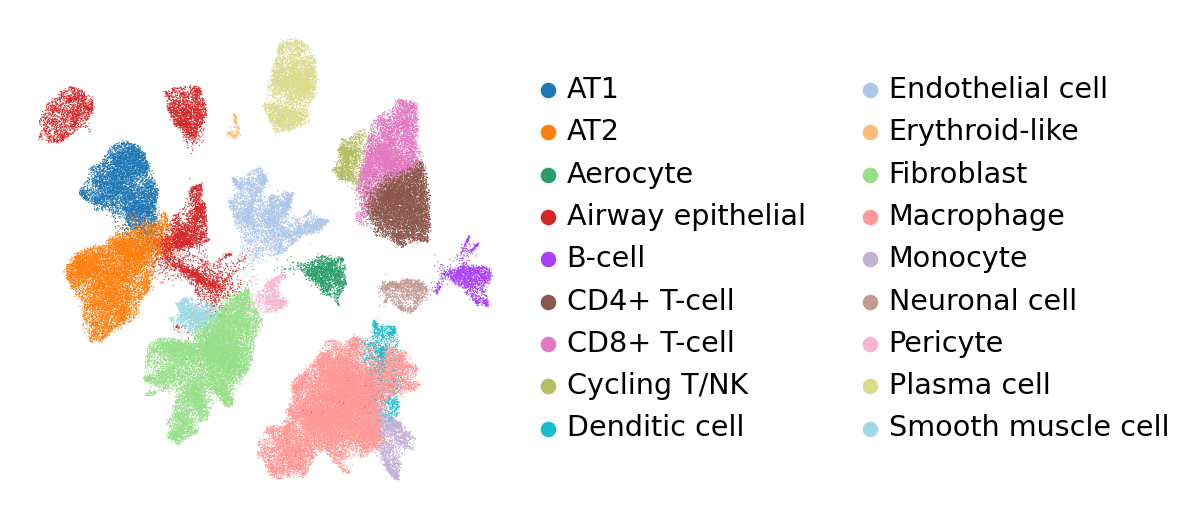

In [8]:
with rc_context({'figure.figsize': (4,4)}):
    sc.pl.umap(adata, color=['cell type'], frameon=False, title = '', save = '_7A.svg')
    #sc.pl.umap(adata, color=['status'])

In [9]:
hubs = sp.load_hubs(species = 'Human')

In [10]:
trans = sp.translator(data = adata, hub = hubs.hubs)

1656 of 35495 genes not initially present
44 of 1656 translated
1612 still not present


In [11]:
df = hubs.metadata

df[df.tissue.isin(['lung', 'blood'])]

,tissue,cell,hub_num,size,n_sen,hyp
0,blood,memory b cell,0,24,0,1.000000e+00
1,blood,memory b cell,1,1103,7,2.997345e-01
2,blood,monocyte,1,75,1,3.096049e-01
3,blood,monocyte,2,23,0,1.000000e+00
4,blood,monocyte,3,21,3,1.443159e-04
5,blood,naive b cell,0,178,0,1.000000e+00
6,blood,naive b cell,1,112,4,2.287746e-03
7,blood,neutrophil,0,1265,5,7.525880e-01
8,blood,neutrophil,1,168,3,5.018619e-02
9,blood,nk cell,0,242,6,1.263923e-03


In [12]:
sel_hubs = {k:v for (k,v) in hubs.hubs.items() if k[0] in ['lung']}

In [13]:
list(sel_hubs)

[('lung', 'basal cell', 0),
 ('lung', 'ciliated epithelial cell', 0),
 ('lung', 'club cell', 0),
 ('lung', 'endothelial cell', 0),
 ('lung', 'endothelial cell', 1),
 ('lung', 'fibroblast', 0),
 ('lung', 'macrophage', 1),
 ('lung', 'monocyte', 0),
 ('lung', 't cell', 0),
 ('lung', 'type ii pneumocyte', 0)]

In [ ]:
cdata = adata.copy() #lets trim down the fat

In [ ]:
adata

In [13]:
del cdata.layers['counts']

cdata.X = cdata.layers['scvi_normalized']
del cdata.layers['scvi_normalized']

In [ ]:
for hub in sel_hubs:
    namer = '__'.join([str(x) for x in hub])
    cdata.obs[namer] = sp.score_all_cells(cdata, hub = sel_hubs[hub],
                                     translator= trans, binarize = False,
                                     identifiers = ['cell type'])

  0%|                                                                                                | 0/18 [00:00<?, ?it/s]

1942/2047(94.87%) genes present in data
1944/2047(94.97%) genes present in data after translation
Still not present: ['RBBP8NL', 'ERVMER34-1', 'NKAIN4', 'DCAF4L1', 'SAMD13', 'HOXD1', 'NPIPA3', 'C17orf107', 'MESP1', 'AARD', 'IGHV4-59', 'TRGV5', 'FKBPL', 'CLEC3B', 'IGHV1-18', 'F8A1', 'ZNF416', 'VPS37D', 'SPTSSB', 'FGF14-AS2', 'LINC00526', 'MYCL', 'IGFL2', 'LCMT2', 'ACE2', 'SP5', 'SLC5A7', 'SLC7A4', 'UBD', 'IGKV1-5', 'ZNF853', 'C1QTNF9', 'IGLV3-19', 'FAM71A', 'PRSS2', 'IGHV3-43', 'PRR36', 'IGLV2-11', 'ODAM', 'PPP1R14D', 'HCAR1', 'DRD1', 'IGLV2-8', 'UBXN10-AS1', 'IGLV3-1', 'FAM71E1', 'RNFT2', 'SERPINB4', 'IGKV1-39', 'GBP6', 'FAM220A', 'IGHV5-51', 'CSF2', 'MYLPF', 'FOXA3', 'LYPD3', 'THTPA', 'DEFB4A', 'KLK7', 'CSNK2A3', 'HIST1H4J', 'IGKV1-9', 'PRSS1', 'AC083843.1', 'SLCO1B3', 'SYCE3', 'ALDH3B2', 'RGMB-AS1', 'IGHV3-49', 'ALG1L', 'CYP27B1', 'ELFN2', 'KLHDC7A', 'KRT16', 'AKR1B10', 'HABP2', 'MUC21', 'SKIDA1', 'C1QL2', 'VGLL1', 'NANOS1', 'HRCT1', 'AL049794.1', 'IGHV1-2', 'C2CD4A', 'PSAPL1', 'MRPL

  0%|                                                                                                | 0/18 [00:00<?, ?it/s]

271/311(87.14%) genes present in data
272/311(87.46%) genes present in data after translation
Still not present: ['IGLV1-40', 'LINC01607', 'ADH1C', 'LINC00326', 'IGHV4-39', 'IGKV1-5', 'ALDH3B2', 'IGHV3-49', 'CCDC89', 'IGLV2-23', 'IGLV3-19', 'IGLV3-21', 'IGHV1-69-2', 'IGHV3-21', 'IGHV4-59', 'PEX12', 'FOLR3', 'IGLV2-11', 'FOXN3-AS1', 'IGLV1-47', 'IGHV1-18', 'DEFB124', 'AVPR1A', 'IGLV3-1', 'PCDHB1', 'IGKV1-12', 'EIF5AL1', 'AC100830.3', 'TEX26', 'IGHV1-2', 'IGKV1-39', 'TIMP4', 'GBP6', 'PGM5P3-AS1', 'BEND5', 'RBM24', 'IGHV5-51', 'LGALS9C', 'STK24-AS1']


  0%|                                                                                                | 0/18 [00:00<?, ?it/s]

1683/1747(96.34%) genes present in data
1684/1747(96.39%) genes present in data after translation
Still not present: ['CKMT1A', 'GPR87', 'AC159540.1', 'RASSF10', 'PCDHA12', 'ZBED6', 'ZFY', 'MMEL1', 'SPTSSB', 'IGFL2', 'SP5', 'TMEM59L', 'SALL2', 'UNC5B-AS1', 'IGLV3-19', 'PRSS2', 'IGLV3-21', 'APOH', 'IGHV3-53', 'IGLV2-8', 'NACA2', 'UBXN10-AS1', 'IGKV1-39', 'FAM220A', 'IGHV5-51', 'METTL7B', 'EPN3', 'HIST1H4J', 'IGKV1-9', 'HSPB2', 'NKX2-1-AS1', 'AC083843.1', 'SYCE3', 'CRABP2', 'ELFN2', 'KLHDC7A', 'TMEM217', 'HABP2', 'MUC21', 'SKIDA1', 'C1QL2', 'HRCT1', 'EIF5AL1', 'IGHV1-2', 'PSAPL1', 'IGLV1-40', 'GPR37', 'PYCARD-AS1', 'IGHV4-39', 'ALDH3A1', 'IVL', 'GSTA2', 'MTRNR2L3', 'EPHX3', 'IGHV3-21', 'PI3', 'APOA1', 'SSTR2', 'VTN', 'DKK1', 'IGLV1-47', 'AADAC', 'LRRC55']


 94%|██████████████████████████████████████████████████████████████████████████████████▏    | 17/18 [02:09<00:07,  7.12s/it]

In [27]:
cdata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,0,1,1.840604,Fibroblast,COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,1,24.213076,Fibroblast,COVID
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID


In [47]:
df = cdata.obs[cdata.obs.columns[15:]]

In [48]:
df

,blood__memory b cell__0,blood__memory b cell__1,blood__monocyte__1,blood__monocyte__2,blood__monocyte__3,blood__naive b cell__0,blood__naive b cell__1,blood__neutrophil__0,blood__neutrophil__1,blood__nk cell__0,...,lung__basal cell__0,lung__ciliated epithelial cell__0,lung__club cell__0,lung__endothelial cell__0,lung__endothelial cell__1,lung__fibroblast__0,lung__macrophage__1,lung__monocyte__0,lung__t cell__0,lung__type ii pneumocyte__0
TTTGACTAGAGCCGAT-1_15,1.403684,3.077951,8.582929,1.572000,1.018096,3.948085,2.392649,20.539241,7.406225,12.741321,...,67.426962,2.878080,17.681207,0.984042,3.063263,9.376639,2.868846,2.309576,15.867646,7.776793
TTAGTCTGTATTTCCT-1_15,1.154272,2.916017,9.376470,0.623409,0.633424,6.881233,2.914531,19.730580,10.825416,18.113806,...,77.998616,2.122681,21.478805,1.171792,2.426113,8.776569,3.641923,3.004166,16.728149,3.076458
AGGCATTCAGCTACAT-1_15,1.370827,3.117540,6.563363,3.667438,0.859060,4.075617,2.427363,19.979332,6.874783,14.126058,...,101.718852,1.125716,24.109501,1.523510,2.793132,9.996879,2.654805,2.163535,13.100253,6.086658
GGTGATTAGAGGATCC-1_15,1.154272,3.212367,7.657607,3.117955,0.392532,4.140726,3.015310,20.018934,7.278528,17.769361,...,72.109179,2.547397,20.764066,0.678347,3.214375,9.922492,4.881612,2.749224,14.536566,5.396079
CAGTTCCGTAGCACAG-1_15,1.417982,3.395337,9.862298,2.223816,0.033925,6.267986,2.731474,20.274059,9.290020,17.330353,...,81.492844,2.357878,22.199792,0.389760,2.761068,11.111242,2.651042,2.565895,15.302307,8.266756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,1.248158,0.524619,2.302604,-0.029144,-0.009107,0.246961,0.235671,1.604428,1.718896,1.487157,...,15.642292,0.547689,3.190910,0.225654,1.298815,0.651571,1.858320,1.560170,1.760085,1.511268
CGTGAATCATGTCTAG-1_27,-0.013867,0.411134,-0.009551,-0.015000,0.248462,0.841995,1.033067,1.859571,0.456246,7.691403,...,12.197608,0.465597,3.693179,1.079375,0.469477,0.915110,3.963666,0.308209,3.331073,0.504442
GCCGATGAGTAAACGT-1_27,-0.021277,0.312024,0.969814,-0.023636,-0.012750,1.032173,0.029170,4.513159,1.015866,3.020613,...,5.562507,0.036294,2.640970,0.073525,0.837038,1.114717,-0.015113,0.553161,2.045646,0.786747
AGGGTGAGTATCAGGG-1_27,0.517555,0.328455,0.275034,1.222727,-0.021858,0.088817,0.627881,3.218701,0.497806,3.891448,...,9.220641,0.096264,1.972279,0.135645,-0.019143,0.945381,0.662640,0.351573,1.944822,1.405837


In [14]:
#df.to_pickle('../data/files/12_LETHAL_COVID_SEN_SCORES.pickle')

In [14]:
df = pd.read_pickle('../data/files/12_LETHAL_COVID_SEN_SCORES.pickle')

In [15]:
df

,blood__memory b cell__0,blood__memory b cell__1,blood__monocyte__1,blood__monocyte__2,blood__monocyte__3,blood__naive b cell__0,blood__naive b cell__1,blood__neutrophil__0,blood__neutrophil__1,blood__nk cell__0,...,lung__basal cell__0,lung__ciliated epithelial cell__0,lung__club cell__0,lung__endothelial cell__0,lung__endothelial cell__1,lung__fibroblast__0,lung__macrophage__1,lung__monocyte__0,lung__t cell__0,lung__type ii pneumocyte__0
TTTGACTAGAGCCGAT-1_15,1.403684,3.077951,8.582929,1.572000,1.018096,3.948085,2.392649,20.539241,7.406225,12.741321,...,67.426962,2.878080,17.681207,0.984042,3.063263,9.376639,2.868846,2.309576,15.867646,7.776793
TTAGTCTGTATTTCCT-1_15,1.154272,2.916017,9.376470,0.623409,0.633424,6.881233,2.914531,19.730580,10.825416,18.113806,...,77.998616,2.122681,21.478805,1.171792,2.426113,8.776569,3.641923,3.004166,16.728149,3.076458
AGGCATTCAGCTACAT-1_15,1.370827,3.117540,6.563363,3.667438,0.859060,4.075617,2.427363,19.979332,6.874783,14.126058,...,101.718852,1.125716,24.109501,1.523510,2.793132,9.996879,2.654805,2.163535,13.100253,6.086658
GGTGATTAGAGGATCC-1_15,1.154272,3.212367,7.657607,3.117955,0.392532,4.140726,3.015310,20.018934,7.278528,17.769361,...,72.109179,2.547397,20.764066,0.678347,3.214375,9.922492,4.881612,2.749224,14.536566,5.396079
CAGTTCCGTAGCACAG-1_15,1.417982,3.395337,9.862298,2.223816,0.033925,6.267986,2.731474,20.274059,9.290020,17.330353,...,81.492844,2.357878,22.199792,0.389760,2.761068,11.111242,2.651042,2.565895,15.302307,8.266756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,1.248158,0.524619,2.302604,-0.029144,-0.009107,0.246961,0.235671,1.604428,1.718896,1.487157,...,15.642292,0.547689,3.190910,0.225654,1.298815,0.651571,1.858320,1.560170,1.760085,1.511268
CGTGAATCATGTCTAG-1_27,-0.013867,0.411134,-0.009551,-0.015000,0.248462,0.841995,1.033067,1.859571,0.456246,7.691403,...,12.197608,0.465597,3.693179,1.079375,0.469477,0.915110,3.963666,0.308209,3.331073,0.504442
GCCGATGAGTAAACGT-1_27,-0.021277,0.312024,0.969814,-0.023636,-0.012750,1.032173,0.029170,4.513159,1.015866,3.020613,...,5.562507,0.036294,2.640970,0.073525,0.837038,1.114717,-0.015113,0.553161,2.045646,0.786747
AGGGTGAGTATCAGGG-1_27,0.517555,0.328455,0.275034,1.222727,-0.021858,0.088817,0.627881,3.218701,0.497806,3.891448,...,9.220641,0.096264,1.972279,0.135645,-0.019143,0.945381,0.662640,0.351573,1.944822,1.405837


In [16]:
adata.obsm['hub_scores'] = df

In [18]:
def find_outliers(scores, mult = 3):
    sd = scores.std()
    mu = scores.mean()
    
    thresh = mu + mult*sd
    
    return scores > thresh
    

In [113]:
#intersection of individual sample-cell outliers and all cell outliers to avoid condfounding factors
big_out = []
removers = [] #may not use this but keey for now
for i, row in adata.obs[['cell type', 'Sample']].drop_duplicates().iterrows():
    
    sub = adata[(adata.obs['cell type'] == row['cell type']) & (adata.obs.Sample == row.Sample)]
    

    out = []
    for hub in sub.obsm['hub_scores'].columns:


        out.append(find_outliers(sub.obsm['hub_scores'][hub], mult = 3))


    big_out.append(pd.concat(out, axis = 1))
        
    if len(sub) < 100:
        removers.append([row.Sample, row['cell type']])
            

In [20]:
#orig if above doesnt end up working
big_out = []

#may want to add filter so that x number of cells in aged organism exists, or can just filter later...
for cell in adata.obs['cell type'].unique():
    #print(tissue, cell)

    sub = adata[adata.obs['cell type'] == cell]

    out = []
    for hub in sub.obsm['hub_scores'].columns:


        out.append(find_outliers(sub.obsm['hub_scores'][hub], mult = 3))

      
    big_out.append(pd.concat(out, axis = 1))
    

In [21]:
adata.obsm['sen_outlier'] = pd.concat(big_out).reindex(adata.obs.index)
adata.obsm['sen_outlier']

,blood__memory b cell__0,blood__memory b cell__1,blood__monocyte__1,blood__monocyte__2,blood__monocyte__3,blood__naive b cell__0,blood__naive b cell__1,blood__neutrophil__0,blood__neutrophil__1,blood__nk cell__0,...,lung__basal cell__0,lung__ciliated epithelial cell__0,lung__club cell__0,lung__endothelial cell__0,lung__endothelial cell__1,lung__fibroblast__0,lung__macrophage__1,lung__monocyte__0,lung__t cell__0,lung__type ii pneumocyte__0
TTTGACTAGAGCCGAT-1_15,False,True,False,False,False,False,False,True,False,False,...,True,True,True,True,False,True,False,False,True,True
TTAGTCTGTATTTCCT-1_15,False,False,True,False,False,True,False,False,True,False,...,True,False,True,True,False,True,False,False,True,False
AGGCATTCAGCTACAT-1_15,False,True,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False
GGTGATTAGAGGATCC-1_15,False,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,False,False,False
CAGTTCCGTAGCACAG-1_15,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CGTGAATCATGTCTAG-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GCCGATGAGTAAACGT-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AGGGTGAGTATCAGGG-1_27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Epithelial

In [22]:
epi = adata[adata.obs['cell type'].isin(['AT1', 'AT2', 'Airway epithelial'])]

In [23]:
epi

View of AnnData object with n_obs × n_vars = 25423 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'status'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'hub_scores', 'sen_outlier'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [24]:
# epi.obsm['sen_outlier'] = epi.obsm['sen_outlier'][['lung__basal cell__0',
#                         'lung__ciliated epithelial cell__0',
#  'lung__club cell__0',
#  'lung__type ii pneumocyte__0']]


# epi.obsm['sen_outlier'] = epi.obsm['sen_outlier'][[
#                         'lung__ciliated epithelial cell__0', 'lung__basal cell__0']]

#'lung__ciliated epithelial cell__0 good

#lung__basal cell__0 lung__club cell__0 ok 

In [25]:
epi.obs['num outliers'] = epi.obsm['sen_outlier'].sum(axis = 1)

/tmp/ipykernel_1982764/1264907249.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  epi.obs['num outliers'] = epi.obsm['sen_outlier'].sum(axis = 1)


In [26]:
epi.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,num outliers
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID,11
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID,10
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID,5
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID,7
GTTCCGTAGACCCGCT-1_15,L08cov,False,2295,2295,5465.0,0.0,0.0,3.0,0.054895,0,0,4,1.832845,AT1,COVID,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCTTCCAGGCATGCA-1_27,L22cov,False,360,360,407.0,0.0,0.0,0.0,0.000000,0,0,9,24.570024,AT2,COVID,0
GCACGGTCAGAAGTTA-1_27,L22cov,False,336,336,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID,0
TTGTGGATCATAGGCT-1_27,L22cov,False,329,329,406.0,0.0,0.0,1.0,0.246305,0,0,9,24.752476,AT2,COVID,0
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID,0


In [27]:
len(epi.obs[epi.obs['num outliers'] > 0])/len(epi)

0.10219092947331157

In [28]:
epi.obs['has outlier'] = epi.obs['num outliers'] > 0

In [29]:
epi.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,num outliers,has outlier
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID,11,True
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID,10,True
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID,5,True
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID,7,True
GTTCCGTAGACCCGCT-1_15,L08cov,False,2295,2295,5465.0,0.0,0.0,3.0,0.054895,0,0,4,1.832845,AT1,COVID,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCTTCCAGGCATGCA-1_27,L22cov,False,360,360,407.0,0.0,0.0,0.0,0.000000,0,0,9,24.570024,AT2,COVID,0,False
GCACGGTCAGAAGTTA-1_27,L22cov,False,336,336,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID,0,False
TTGTGGATCATAGGCT-1_27,L22cov,False,329,329,406.0,0.0,0.0,1.0,0.246305,0,0,9,24.752476,AT2,COVID,0,False
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID,0,False


In [30]:
epi_res = epi.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()
epi_res = epi_res.rename(columns={'doublet':'n cells'})
epi_res['status'] = epi_res.Sample.map(annotate)

/tmp/ipykernel_1982764/2700832879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  epi_res = epi.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()


In [33]:
epi_res

,cell type,Sample,n cells,status
0,AT1,C51ctr,743,control
1,AT1,C52ctr,907,control
2,AT1,C53ctr,243,control
3,AT1,C54ctr,607,control
4,AT1,C55ctr,490,control
...,...,...,...,...
76,Airway epithelial,L17cov,213,COVID
77,Airway epithelial,L18cov,30,COVID
78,Airway epithelial,L19cov,146,COVID
79,Airway epithelial,L21cov,80,COVID


In [43]:
epi_res['n sen'] = epi.obs[['cell type', 'Sample', 'has outlier']].groupby(['cell type', 'Sample']).sum()['has outlier'].values

/tmp/ipykernel_1982764/2836031307.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  epi_res['n sen'] = epi.obs[['cell type', 'Sample', 'has outlier']].groupby(['cell type', 'Sample']).sum()['has outlier'].values


In [44]:
epi_res['% sen'] = epi_res['n sen']/epi_res['n cells'] * 100

In [45]:
epi_res

,cell type,Sample,n cells,status,n sen,% sen
0,AT1,C51ctr,743,control,71,9.555855
1,AT1,C52ctr,907,control,109,12.017641
2,AT1,C53ctr,243,control,28,11.522634
3,AT1,C54ctr,607,control,11,1.812191
4,AT1,C55ctr,490,control,5,1.020408
...,...,...,...,...,...,...
76,Airway epithelial,L17cov,213,COVID,15,7.042254
77,Airway epithelial,L18cov,30,COVID,0,0.000000
78,Airway epithelial,L19cov,146,COVID,6,4.109589
79,Airway epithelial,L21cov,80,COVID,5,6.250000


In [29]:
# for remover in removers:
#     epi_res = epi_res[~((epi_res['cell type'] == remover[1]) & (epi_res.Sample == remover[0]))]

In [46]:
epi_res

,cell type,Sample,n cells,status,n sen,% sen
0,AT1,C51ctr,743,control,71,9.555855
1,AT1,C52ctr,907,control,109,12.017641
2,AT1,C53ctr,243,control,28,11.522634
3,AT1,C54ctr,607,control,11,1.812191
4,AT1,C55ctr,490,control,5,1.020408
...,...,...,...,...,...,...
76,Airway epithelial,L17cov,213,COVID,15,7.042254
77,Airway epithelial,L18cov,30,COVID,0,0.000000
78,Airway epithelial,L19cov,146,COVID,6,4.109589
79,Airway epithelial,L21cov,80,COVID,5,6.250000


In [51]:
import matplotlib as mpl
import textwrap
mpl.rcdefaults()

### Fig 7C

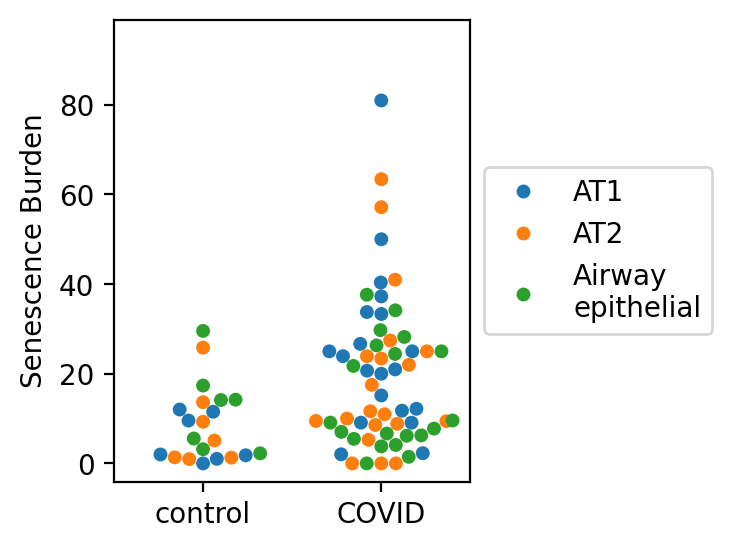

In [80]:
plt.figure(figsize=(2.3,3))

ax = sns.swarmplot(data = epi_res, x = 'status', y = '% sen', hue='cell type')



leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Now wrap the texts in the legend
for text in leg.get_texts():
    text.set_text(textwrap.fill(text.get_text(), 10))  # Adjust 20 if necessary



# x1, x2 = 0, 1  
# y, h, col = epi_res['% sen'].max() + 8, 0.1, 'k'  # y position and height of the bar, color

# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "0.005", ha='center', va='bottom', color=col)

plt.ylim(top = 99)

plt.xlabel('')
plt.ylabel('Senescence Burden')


plt.savefig('figures/7C.png',dpi = 600, bbox_inches = 'tight')
plt.savefig('figures/7C.svg',bbox_inches = 'tight')


plt.show()

In [65]:
x = epi_res[epi_res.status == 'COVID']['% sen']
y = epi_res[epi_res.status == 'control']['% sen']

stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=892.0, pvalue=0.004821164159929573)

## Macrophage

In [90]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,sen_outlier
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID,1
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID,1
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID,1
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID,1
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,0,1,1.840604,Fibroblast,COVID,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,1,24.213076,Fibroblast,COVID,0
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID,0
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID,0
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID,0


In [91]:
mac = adata[adata.obs['cell type'] == 'Macrophage']

In [92]:
mac

View of AnnData object with n_obs × n_vars = 23406 × 20631
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell type', 'status', 'sen_outlier'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'hub_scores', 'sen_outlier'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [93]:
mac.obsm['sen_outlier'] = mac.obsm['sen_outlier'][['lung__macrophage__1']]

/tmp/ipykernel_1982764/797169429.py:1: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  mac.obsm['sen_outlier'] = mac.obsm['sen_outlier'][['lung__macrophage__1']]


In [94]:
mac.obs['num outliers'] = mac.obsm['sen_outlier'].sum(axis = 1)

In [95]:
mac_res = mac.obs.groupby(['Sample']).count()[['doublet']].reset_index()
mac_res = mac_res.rename(columns={'doublet':'n cells'})
mac_res['status'] = mac_res.Sample.map(annotate)

/tmp/ipykernel_1982764/2141140208.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mac_res = mac.obs.groupby(['Sample']).count()[['doublet']].reset_index()


In [99]:
mac.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,sen_outlier,num outliers
TGGGATTCACGCAAAG-1_15,L08cov,False,2358,2358,5261.0,0.0,0.0,2.0,0.038016,0,0,8,1.901502,Macrophage,COVID,1,0
GATCACATCGCCCAGA-1_15,L08cov,False,2475,2475,5053.0,0.0,0.0,7.0,0.138532,0,0,0,1.981375,Macrophage,COVID,1,0
CACACAATCGTTCGCT-1_15,L08cov,False,2459,2459,5083.0,0.0,0.0,13.0,0.255754,0,0,0,1.969667,Macrophage,COVID,1,0
TCTATACGTAATGCTC-1_15,L08cov,False,2439,2439,5028.0,0.0,0.0,14.0,0.278441,0,0,0,1.993223,Macrophage,COVID,1,1
AAAGTGAAGAGTCACG-1_15,L08cov,False,2532,2532,4814.0,0.0,0.0,5.0,0.103864,0,0,0,2.079434,Macrophage,COVID,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCAATTCGTTGTCAGT-1_27,L22cov,False,330,330,402.0,0.0,0.0,0.0,0.000000,0,0,12,24.875622,Macrophage,COVID,0,0
CACACAAGTGGACTGA-1_27,L22cov,False,318,318,402.0,0.0,0.0,0.0,0.000000,0,0,12,24.875622,Macrophage,COVID,0,0
TCATCATCAATAGTAG-1_27,L22cov,False,330,330,412.0,0.0,0.0,0.0,0.000000,0,0,0,24.509806,Macrophage,COVID,0,0
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID,0,0


In [101]:
mac_res['n sen'] = mac.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values

/tmp/ipykernel_1982764/1784623819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mac_res['n sen'] = mac.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values


In [102]:
mac_res['% sen'] = mac_res['n sen']/mac_res['n cells'] * 100
mac_res['cell type'] = 'Macrophage'

In [ ]:
# for remover in removers:
#     mac_res = mac_res[~((mac_res['cell type'] == remover[1]) & (mac_res.Sample == remover[0]))]

In [103]:
mac_res

,Sample,n cells,status,n sen,% sen,cell type
0,C51ctr,350,control,0,0.000000,Macrophage
1,C52ctr,394,control,1,0.253807,Macrophage
2,C53ctr,823,control,2,0.243013,Macrophage
3,C54ctr,389,control,2,0.514139,Macrophage
4,C55ctr,708,control,0,0.000000,Macrophage
5,C56ctr,449,control,2,0.445434,Macrophage
6,C57ctr,348,control,0,0.000000,Macrophage
7,L01cov,422,COVID,0,0.000000,Macrophage
8,L03cov,1538,COVID,190,12.353706,Macrophage
9,L04cov,1197,COVID,3,0.250627,Macrophage


In [54]:
sns.swarmplot(data = mac_res, x = 'status', y = '% sen')

<AxesSubplot: xlabel='status', ylabel='% sen'>

In [104]:
x = mac_res[mac_res.status == 'COVID']['% sen']
y = mac_res[mac_res.status == 'control']['% sen']

stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=73.5, pvalue=0.8620681087314592)

## Fibs

In [105]:
fib = adata[adata.obs['cell type'] == 'Fibroblast']

In [106]:
fib.obsm['sen_outlier'] = fib.obsm['sen_outlier'][['lung__fibroblast__0']]

/tmp/ipykernel_1982764/3738197540.py:1: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  fib.obsm['sen_outlier'] = fib.obsm['sen_outlier'][['lung__fibroblast__0']]


In [107]:
fib.obs['num outliers'] = fib.obsm['sen_outlier'].sum(axis = 1)

In [108]:
fib_res = fib.obs.groupby(['Sample']).count()[['doublet']].reset_index()
fib_res = fib_res.rename(columns={'doublet':'n cells'})
fib_res['status'] = fib_res.Sample.map(annotate)

/tmp/ipykernel_1982764/4046850836.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fib_res = fib.obs.groupby(['Sample']).count()[['doublet']].reset_index()


In [110]:
fib_res['n sen'] = fib.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values

/tmp/ipykernel_1982764/2945129528.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fib_res['n sen'] = fib.obs[['Sample', 'num outliers']].groupby(['Sample']).sum()['num outliers'].values


In [111]:
fib_res['% sen'] = fib_res['n sen']/fib_res['n cells'] * 100
fib_res['cell type'] = 'Fibroblast'

In [114]:
for remover in removers:
    fib_res = fib_res[~((fib_res['cell type'] == remover[1]) & (fib_res.Sample == remover[0]))]

In [115]:
fib_res

,Sample,n cells,status,n sen,% sen,cell type
0,C51ctr,695,control,0,0.000000,Fibroblast
1,C52ctr,351,control,0,0.000000,Fibroblast
2,C53ctr,648,control,2,0.308642,Fibroblast
3,C54ctr,637,control,0,0.000000,Fibroblast
4,C55ctr,805,control,0,0.000000,Fibroblast
5,C56ctr,535,control,1,0.186916,Fibroblast
6,C57ctr,537,control,0,0.000000,Fibroblast
7,L01cov,414,COVID,0,0.000000,Fibroblast
8,L03cov,434,COVID,147,33.870968,Fibroblast
9,L04cov,323,COVID,0,0.000000,Fibroblast


In [116]:
sns.swarmplot(data = fib_res, x = 'status', y = '% sen')

<Axes: xlabel='status', ylabel='% sen'>

In [117]:
x = fib_res[fib_res.status == 'COVID']['% sen']
y = fib_res[fib_res.status == 'control']['% sen']

stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=87.5, pvalue=0.2906880632273381)

## ECs

In [119]:
ec = adata[adata.obs['cell type'].isin(['Endothelial cell', 'Aerocyte'])]
ec.obsm['sen_outlier'] = ec.obsm['sen_outlier'][['lung__endothelial cell__0',
                        'lung__endothelial cell__1']]
ec.obs['num outliers'] = ec.obsm['sen_outlier'].sum(axis = 1)
ec.obs['has outlier'] = ec.obs['num outliers'] > 0


/tmp/ipykernel_1982764/458027258.py:2: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  ec.obsm['sen_outlier'] = ec.obsm['sen_outlier'][['lung__endothelial cell__0',


In [120]:
ec_res = ec.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()
ec_res = ec_res.rename(columns={'doublet':'n cells'})
ec_res['status'] = ec_res.Sample.map(annotate)

/tmp/ipykernel_1982764/4226821782.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ec_res = ec.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()


In [122]:
ec_res['n sen'] = ec.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values
ec_res['% sen'] = ec_res['n sen']/ec_res['n cells'] * 100


/tmp/ipykernel_1982764/692141100.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ec_res['n sen'] = ec.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values


In [123]:
for remover in removers:
    ec_res = ec_res[~((ec_res['cell type'] == remover[1]) & (ec_res.Sample == remover[0]))]

In [124]:
ec_res

,cell type,Sample,n cells,status,n sen,% sen
8,Aerocyte,L03cov,121,COVID,33,27.272727
12,Aerocyte,L06cov,107,COVID,5,4.672897
14,Aerocyte,L08cov,103,COVID,2,1.941748
19,Aerocyte,L13cov,108,COVID,0,0.000000
22,Aerocyte,L17cov,216,COVID,0,0.000000
23,Aerocyte,L18cov,121,COVID,1,0.826446
27,Endothelial cell,C51ctr,547,control,3,0.548446
28,Endothelial cell,C52ctr,302,control,6,1.986755
29,Endothelial cell,C53ctr,283,control,14,4.946996
30,Endothelial cell,C54ctr,160,control,2,1.250000


In [71]:
sns.swarmplot(data = ec_res, x = 'status', y = '% sen', hue='cell type')

<AxesSubplot: xlabel='status', ylabel='% sen'>

# T/B

In [125]:
lymph = adata[adata.obs['cell type'].isin(['CD4+ T-cell', 'CD8+ T-cell', 'B-cell', 'Plasma cell', 'Cycling T/NK'])]


lymph.obsm['sen_outlier'] = lymph.obsm['sen_outlier'][['blood__nk cell__0',
'blood__t cell__3', 'blood__t cell__4',
'blood__naive b cell__1',
'blood__memory b cell__1']]


lymph.obs['num outliers'] = lymph.obsm['sen_outlier'].sum(axis = 1)
lymph.obs['has outlier'] = lymph.obs['num outliers'] > 0


/tmp/ipykernel_1982764/760231875.py:4: ImplicitModificationWarning: Setting element `.obsm['sen_outlier']` of view, initializing view as actual.
  lymph.obsm['sen_outlier'] = lymph.obsm['sen_outlier'][['blood__nk cell__0',


In [126]:
lymph_res = lymph.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()
lymph_res = lymph_res.rename(columns={'doublet':'n cells'})
lymph_res['status'] = lymph_res.Sample.map(annotate)

/tmp/ipykernel_1982764/120243789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lymph_res = lymph.obs.groupby(['cell type', 'Sample']).count()[['doublet']].reset_index()


In [127]:
lymph_res['n sen'] = lymph.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values
lymph_res['% sen'] = lymph_res['n sen']/lymph_res['n cells'] * 100


/tmp/ipykernel_1982764/1435488509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lymph_res['n sen'] = lymph.obs[['cell type', 'Sample', 'num outliers']].groupby(['cell type', 'Sample']).sum()['num outliers'].values


In [128]:
lymph_res

,cell type,Sample,n cells,status,n sen,% sen
0,B-cell,C51ctr,39,control,2,5.128205
1,B-cell,C52ctr,7,control,0,0.000000
2,B-cell,C53ctr,923,control,106,11.484290
3,B-cell,C54ctr,20,control,3,15.000000
4,B-cell,C55ctr,163,control,2,1.226994
...,...,...,...,...,...,...
130,Plasma cell,L17cov,24,COVID,2,8.333333
131,Plasma cell,L18cov,33,COVID,6,18.181818
132,Plasma cell,L19cov,37,COVID,1,2.702703
133,Plasma cell,L21cov,123,COVID,0,0.000000


In [76]:
sns.swarmplot(data = lymph_res, x = 'status', y = '% sen', hue='cell type')

<AxesSubplot: xlabel='status', ylabel='% sen'>

In [83]:
a = adata.obsm['sen_outlier'].sum(axis = 1)
a[a > 0] = 1

In [84]:
a

TTTGACTAGAGCCGAT-1_15    1
TTAGTCTGTATTTCCT-1_15    1
AGGCATTCAGCTACAT-1_15    1
GGTGATTAGAGGATCC-1_15    1
CAGTTCCGTAGCACAG-1_15    1
                        ..
CCTAAGAAGTTGTCAC-1_27    0
CGTGAATCATGTCTAG-1_27    0
GCCGATGAGTAAACGT-1_27    0
AGGGTGAGTATCAGGG-1_27    0
ATGGATCAGAGAGCAA-1_27    0
Length: 98979, dtype: int64

In [85]:
adata.obs['sen_outlier'] = a.astype('category')

In [86]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell type,status,sen_outlier
TTTGACTAGAGCCGAT-1_15,L08cov,False,2576,2576,5714.0,0.0,0.0,1.0,0.017501,0,0,4,1.754386,AT1,COVID,1
TTAGTCTGTATTTCCT-1_15,L08cov,False,2546,2546,5608.0,0.0,0.0,19.0,0.338802,0,0,9,1.787630,AT2,COVID,1
AGGCATTCAGCTACAT-1_15,L08cov,False,2527,2527,5431.0,0.0,0.0,0.0,0.000000,0,0,15,1.843998,Airway epithelial,COVID,1
GGTGATTAGAGGATCC-1_15,L08cov,False,2531,2531,5489.0,0.0,0.0,0.0,0.000000,0,0,9,1.827819,AT2,COVID,1
CAGTTCCGTAGCACAG-1_15,L08cov,False,2503,2503,5446.0,0.0,0.0,10.0,0.183621,0,0,1,1.840604,Fibroblast,COVID,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,1,24.213076,Fibroblast,COVID,0
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Macrophage,COVID,0
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,3,25.000000,AT2,COVID,0
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID,0


In [81]:
sc.set_figure_params(dpi_save = 600)

### Fig 7B

In [ ]:
np.random.seed(1)
ri = np.random.permutation(list(range(adata.shape[0])))

/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


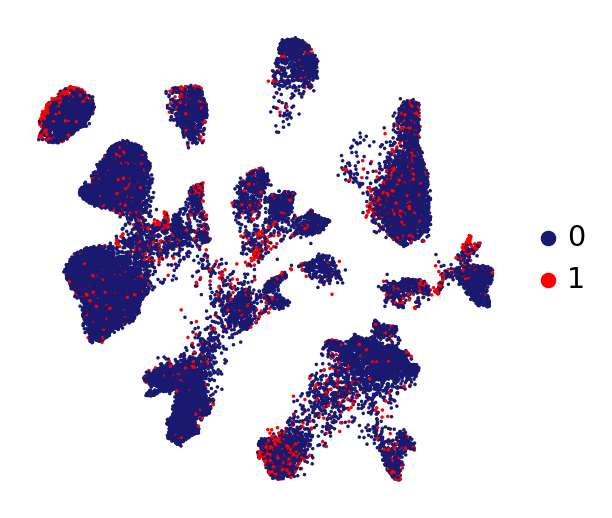

/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jrlab/miniconda3/envs/senepy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


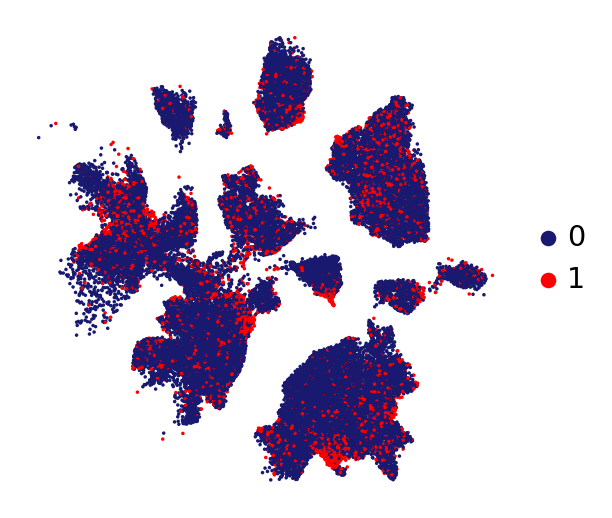

In [88]:


with rc_context({'figure.figsize': (4,4)}):
    
    sub = adata[adata.obs.status == 'control']
    ri = np.random.permutation(list(range(sub.shape[0])))
    sc.pl.umap(sub[ri,:], color = 'sen_outlier', size = 10, 
               palette = ['midnightblue', 'red'], frameon = False, title = '', save = '_7B_pt1.png')
    
    sub = adata[adata.obs.status == 'COVID']
    ri = np.random.permutation(list(range(sub.shape[0])))
    sc.pl.umap(sub[ri,:], color = 'sen_outlier', size = 10, 
               palette = ['midnightblue', 'red'], frameon = False, title = '', save = '_7B_pt2.png')

In [129]:
epi_res['Class'] = 'epithelial'
mac_res['Class'] = 'macrophage'
fib_res['Class'] = 'fibroblast'
ec_res['Class'] = 'endothelial'
lymph_res['Class'] = 'lymphoid'

In [130]:
df = pd.concat([epi_res, mac_res, fib_res, ec_res, lymph_res]).reset_index(drop = True)
df

,cell type,Sample,n cells,status,n sen,% sen,Class
0,AT1,C51ctr,743,control,71,9.555855,epithelial
1,AT1,C52ctr,907,control,109,12.017641,epithelial
2,AT1,C53ctr,243,control,28,11.522634,epithelial
3,AT1,C54ctr,607,control,11,1.812191,epithelial
4,AT1,C55ctr,490,control,5,1.020408,epithelial
...,...,...,...,...,...,...,...
288,Plasma cell,L17cov,24,COVID,2,8.333333,lymphoid
289,Plasma cell,L18cov,33,COVID,6,18.181818,lymphoid
290,Plasma cell,L19cov,37,COVID,1,2.702703,lymphoid
291,Plasma cell,L21cov,123,COVID,0,0.000000,lymphoid


### Fig 7D

/tmp/ipykernel_1982764/2560701839.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data = df, y = '% sen', x = 'Class', hue = 'status',


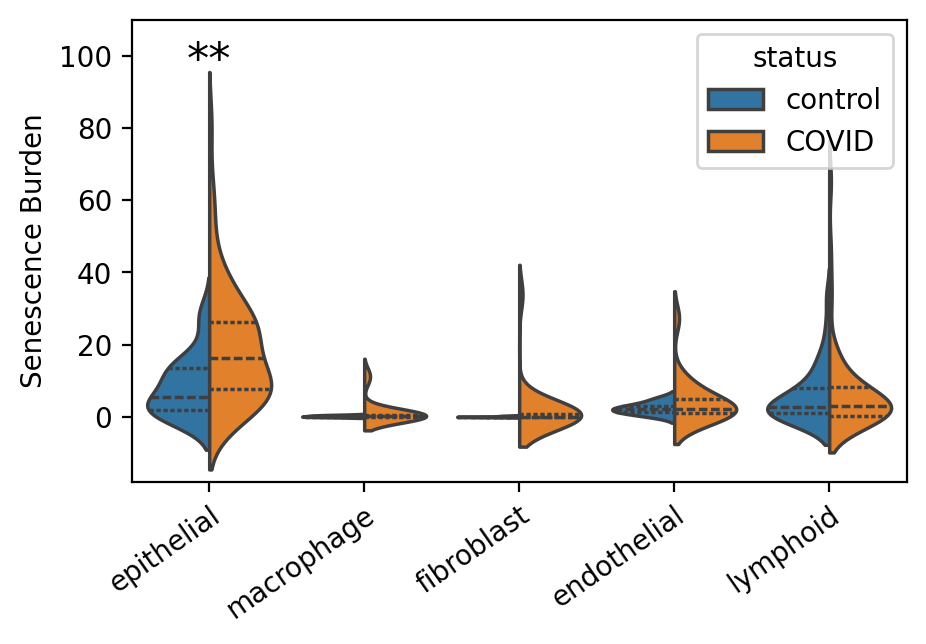

In [138]:
plt.figure(figsize = (5,3))

#sns.swarmplot(data = df, y = '% sen', x = 'Class', hue = 'status', size = 3)
ax = sns.violinplot(data = df, y = '% sen', x = 'Class', hue = 'status', 
               split = True, inner = 'quartiles', scale = 'width')


plt.text(x = 0, y = 95, s = '**', ha = 'center', size = '16')

plt.ylim(top = 110, bottom = -18)

plt.ylabel('Senescence Burden')
plt.xlabel('')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.savefig('figures/7D.png', dpi = 600)


plt.show()

In [169]:


mat = df.pivot(index='cell type', columns='Sample', values='% sen')
mat = mat.fillna(0)
#mat = mat.apply(lambda row: (row - np.mean(row)) / np.std(row), axis=1)


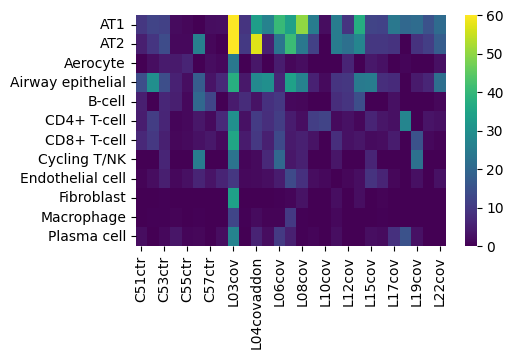

In [176]:
plt.figure(figsize = (5,3))

sns.heatmap(mat, cmap = 'viridis', vmax = 60)

plt.xlabel('')
plt.ylabel('')

plt.show()

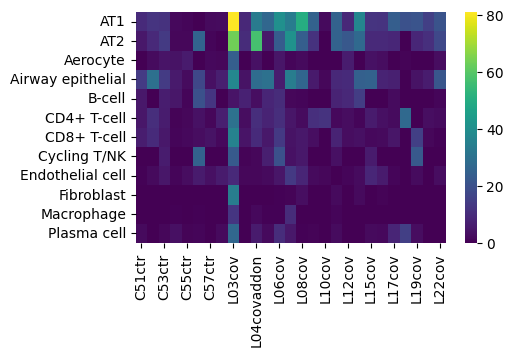

In [177]:
plt.figure(figsize = (5,3))

sns.heatmap(mat, cmap = 'viridis')

plt.xlabel('')
plt.ylabel('')

plt.show()

In [180]:
len(df.Sample.unique())

27